<a href="https://colab.research.google.com/github/ingenziart/w3-django/blob/main/Exploratory_data_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis**

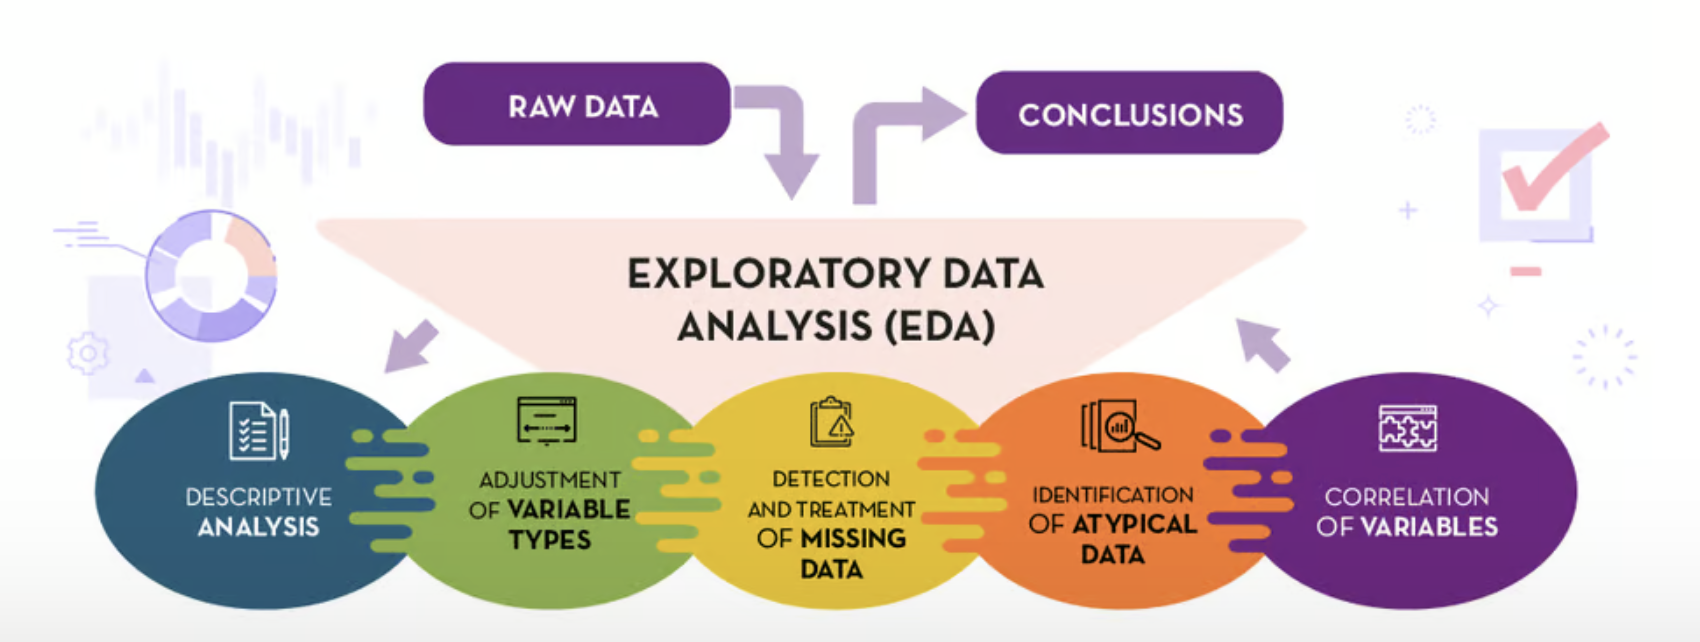



Exploratory Data Analysis(EDA) is an approach to analyzing datasets to summarize their main characteristics, often using visual methods. It helps to uncover patterns, spot anomalies, test hypotheses, and check assumptions using statistical graphics and other data visualization tools. Key techniques include descriptive statistics (mean, median, variance), data visualization (histograms, scatter plots, box plots), and correlation analysis. EDA is typically the first step in data analysis to understand the data structure and guide further data processing or modeling. It emphasizes understanding data distributions, missing values, and relationships between variables.

# **Project 1:Netflix Movies & TV Shows Data Analysis**

In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pg
import plotly.offline as po
po.init_notebook_mode(connected = True)

In [5]:
# reading the dataset
df = pd.read_csv("netflix.csv")

In [ ]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
# looking at the shape of the dataset
df.shape

(8807, 12)

In [ ]:
#Check for missing values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.nunique()  #analysing the number of unique values in every columns.

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [ ]:
check_col = ["date_added", "duration"]

for col in check_col:
    uniques = df[col].unique()
    print("  ",col,":")
    print(uniques)

   date_added :
['September 25, 2021' 'September 24, 2021' 'September 23, 2021' ...
 'December 6, 2018' 'March 9, 2016' 'January 11, 2020']
   duration :
['90 min' '2 Seasons' '1 Season' '91 min' '125 min' '9 Seasons' '104 min'
 '127 min' '4 Seasons' '67 min' '94 min' '5 Seasons' '161 min' '61 min'
 '166 min' '147 min' '103 min' '97 min' '106 min' '111 min' '3 Seasons'
 '110 min' '105 min' '96 min' '124 min' '116 min' '98 min' '23 min'
 '115 min' '122 min' '99 min' '88 min' '100 min' '6 Seasons' '102 min'
 '93 min' '95 min' '85 min' '83 min' '113 min' '13 min' '182 min' '48 min'
 '145 min' '87 min' '92 min' '80 min' '117 min' '128 min' '119 min'
 '143 min' '114 min' '118 min' '108 min' '63 min' '121 min' '142 min'
 '154 min' '120 min' '82 min' '109 min' '101 min' '86 min' '229 min'
 '76 min' '89 min' '156 min' '112 min' '107 min' '129 min' '135 min'
 '136 min' '165 min' '150 min' '133 min' '70 min' '84 min' '140 min'
 '78 min' '7 Seasons' '64 min' '59 min' '139 min' '69 min' '148 min'


<Axes: >

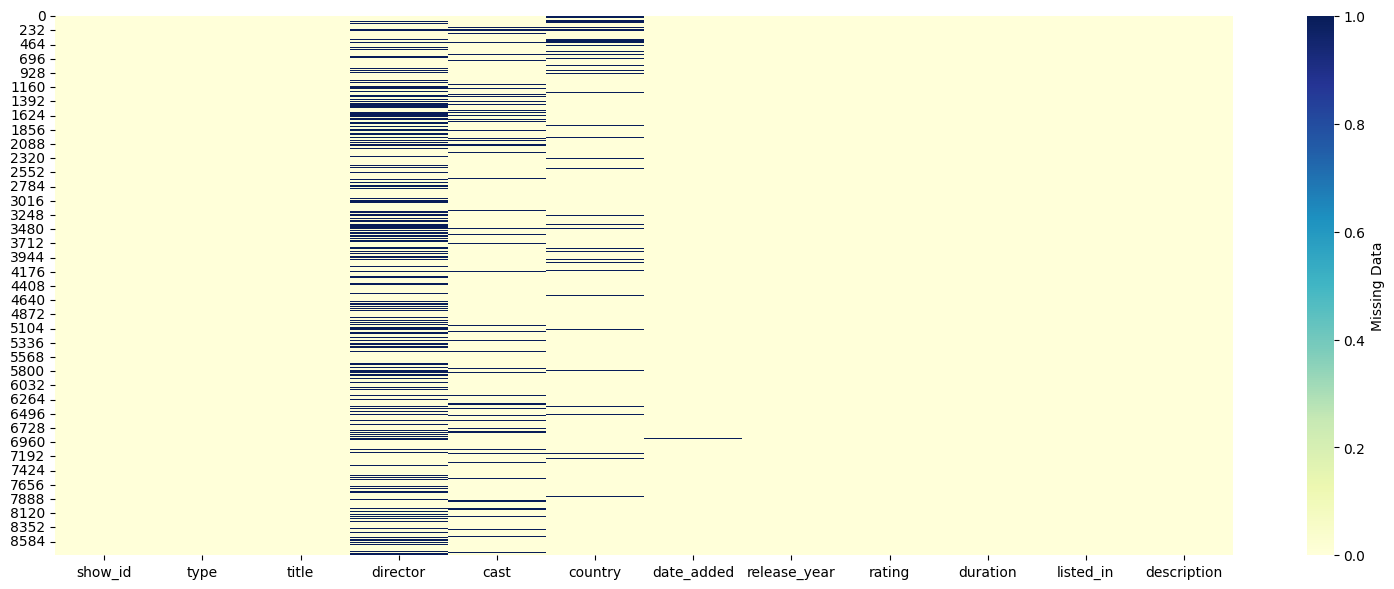

In [ ]:
#Visualizing the Missing Values
plt.figure(figsize = (19,7) )
sns.heatmap(df.isna(), cmap="YlGnBu"
            ,cbar_kws={'label': 'Missing Data'}
           )

In [ ]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
# replacing the NaN values with UNKNOWN
df[ ["director", "cast", "country"] ] = df[ ["director", "cast", "country"] ].replace(np.nan, "UNKNOWN")

In [ ]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          UNKNOWN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          UNKNOWN   
4      s5  TV Show           Kota Factory          UNKNOWN   

                                                cast        country  \
0                                            UNKNOWN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        UNKNOWN   
3                                            UNKNOWN        UNKNOWN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
# Group by the values of the rating column to check the count of the values in each column of the each rating
df.groupby(by="rating").count()

show_id  type  title  director  cast  country  date_added  \
rating                                                                
66 min          1     1      1         1     1        1           1   
74 min          1     1      1         1     1        1           1   
84 min          1     1      1         1     1        1           1   
G              41    41     41        41    41       41          41   
NC-17           3     3      3         3     3        3           3   
NR             80    80     80        80    80       80          79   
PG            287   287    287       287   287      287         287   
PG-13         490   490    490       490   490      490         490   
R             799   799    799       799   799      799         799   
TV-14        2160  2160   2160      2160  2160     2160        2157   
TV-G          220   220    220       220   220      220         220   
TV-MA        3207  3207   3207      3207  3207     3207        3205   
TV-PG         863   863    863       863   863      863         861   
TV-Y          307   307    307       307   307      307         306   
TV-Y7         334   334    334       334   334      334         333   
TV-Y7-FV        6     6      6         6     6        6           6   
UR              3     3      3         3     3        3           3   

          release_year  duration  listed_in  description  
rating                                                    
66 min               1         0          1            1  
74 min               1         0          1            1  
84 min               1         0          1            1  
G                   41        41         41           41  
NC-17                3         3          3            3  
NR                  80        80         80           80  
PG                 287       287        287          287  
PG-13              490       490        490          490  
R                  799       799        799          799  
TV-14             2160      2160       2160         2160  
TV-G               220       220        220          220  
TV-MA             3207      3207       3207         3207  
TV-PG              863       863        863          863  
TV-Y               307       307        307          307  
TV-Y7              334       334        334          334  
TV-Y7-FV             6         6          6            6  
UR                   3         3          3            3

In [ ]:
# removing the anamolies
def anamoly_detect(frame):
    if( "min" in str(frame["rating"])):
        frame["duration"] = frame["rating"]
        frame["rating"] = np.nan
    return frame;

df = df.apply(anamoly_detect, axis=1)

In [ ]:
df.groupby(by="rating").count()

show_id  type  title  director  cast  country  date_added  \
rating                                                                
G              41    41     41        41    41       41          41   
NC-17           3     3      3         3     3        3           3   
NR             80    80     80        80    80       80          79   
PG            287   287    287       287   287      287         287   
PG-13         490   490    490       490   490      490         490   
R             799   799    799       799   799      799         799   
TV-14        2160  2160   2160      2160  2160     2160        2157   
TV-G          220   220    220       220   220      220         220   
TV-MA        3207  3207   3207      3207  3207     3207        3205   
TV-PG         863   863    863       863   863      863         861   
TV-Y          307   307    307       307   307      307         306   
TV-Y7         334   334    334       334   334      334         333   
TV-Y7-FV        6     6      6         6     6        6           6   
UR              3     3      3         3     3        3           3   

          release_year  duration  listed_in  description  
rating                                                    
G                   41        41         41           41  
NC-17                3         3          3            3  
NR                  80        80         80           80  
PG                 287       287        287          287  
PG-13              490       490        490          490  
R                  799       799        799          799  
TV-14             2160      2160       2160         2160  
TV-G               220       220        220          220  
TV-MA             3207      3207       3207         3207  
TV-PG              863       863        863          863  
TV-Y               307       307        307          307  
TV-Y7              334       334        334          334  
TV-Y7-FV             6         6          6            6  
UR                   3         3          3            3

In [ ]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           7
duration         0
listed_in        0
description      0
dtype: int64

In [ ]:
df["rating"].isna().sum()

7

In [ ]:
mask = df["rating"].isna()
df[mask]

show_id     type                                              title  \
5541   s5542    Movie                                    Louis C.K. 2017   
5794   s5795    Movie                              Louis C.K.: Hilarious   
5813   s5814    Movie               Louis C.K.: Live at the Comedy Store   
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5541       Louis C.K.                                         Louis C.K.   
5794       Louis C.K.                                         Louis C.K.   
5813       Louis C.K.                                         Louis C.K.   
5989          UNKNOWN                        Oprah Winfrey, Ava DuVernay   
6827          UNKNOWN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312          UNKNOWN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country          date_added  release_year rating  duration  \
5541  United States       April 4, 2017          2017    NaN    74 min   
5794  United States  September 16, 2016          2010    NaN    84 min   
5813  United States     August 15, 2016          2015    NaN    66 min   
5989        UNKNOWN    January 26, 2017          2017    NaN    37 min   
6827          Japan    December 1, 2016          2013    NaN  1 Season   
7312      Australia    February 1, 2018          2015    NaN  1 Season   
7537          Italy       March 1, 2017          2015    NaN   115 min   

                                 listed_in  \
5541                                Movies   
5794                                Movies   
5813                                Movies   
5989                                Movies   
6827  Anime Series, International TV Shows   
7312                 Kids' TV, TV Comedies   
7537                                Dramas   

                                            description  
5541  Louis C.K. muses on religion, eternal love, gi...  
5794  Emmy-winning comedy writer Louis C.K. brings h...  
5813  The comic puts his trademark hilarious/thought...  
5989  Oprah Winfrey sits down with director Ava DuVe...  
6827  After falling through a wormhole, a space-dwel...  
7312  Adopting a child's perspective, this show take...  
7537  Amid the chaos and horror of World War II, a c...

In [ ]:
# replace NaN values
df["rating"] = df["rating"].replace(np.nan, "UNKNOWN")

In [ ]:
df[df["rating"] == "UNKNOWN"]

show_id     type                                              title  \
5541   s5542    Movie                                    Louis C.K. 2017   
5794   s5795    Movie                              Louis C.K.: Hilarious   
5813   s5814    Movie               Louis C.K.: Live at the Comedy Store   
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5541       Louis C.K.                                         Louis C.K.   
5794       Louis C.K.                                         Louis C.K.   
5813       Louis C.K.                                         Louis C.K.   
5989          UNKNOWN                        Oprah Winfrey, Ava DuVernay   
6827          UNKNOWN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312          UNKNOWN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country          date_added  release_year   rating  duration  \
5541  United States       April 4, 2017          2017  UNKNOWN    74 min   
5794  United States  September 16, 2016          2010  UNKNOWN    84 min   
5813  United States     August 15, 2016          2015  UNKNOWN    66 min   
5989        UNKNOWN    January 26, 2017          2017  UNKNOWN    37 min   
6827          Japan    December 1, 2016          2013  UNKNOWN  1 Season   
7312      Australia    February 1, 2018          2015  UNKNOWN  1 Season   
7537          Italy       March 1, 2017          2015  UNKNOWN   115 min   

                                 listed_in  \
5541                                Movies   
5794                                Movies   
5813                                Movies   
5989                                Movies   
6827  Anime Series, International TV Shows   
7312                 Kids' TV, TV Comedies   
7537                                Dramas   

                                            description  
5541  Louis C.K. muses on religion, eternal love, gi...  
5794  Emmy-winning comedy writer Louis C.K. brings h...  
5813  The comic puts his trademark hilarious/thought...  
5989  Oprah Winfrey sits down with director Ava DuVe...  
6827  After falling through a wormhole, a space-dwel...  
7312  Adopting a child's perspective, this show take...  
7537  Amid the chaos and horror of World War II, a c...

In [ ]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water          UNKNOWN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans          UNKNOWN   
4      s5  TV Show           Kota Factory          UNKNOWN   

                                                cast        country  \
0                                            UNKNOWN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        UNKNOWN   
3                                            UNKNOWN        UNKNOWN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [ ]:
df["date_added"] = df["date_added"].replace(np.nan, "UNKNOWN")

In [ ]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.drop("show_id", axis=1, inplace=True)

In [ ]:
df.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

<Axes: xlabel='type', ylabel='count'>

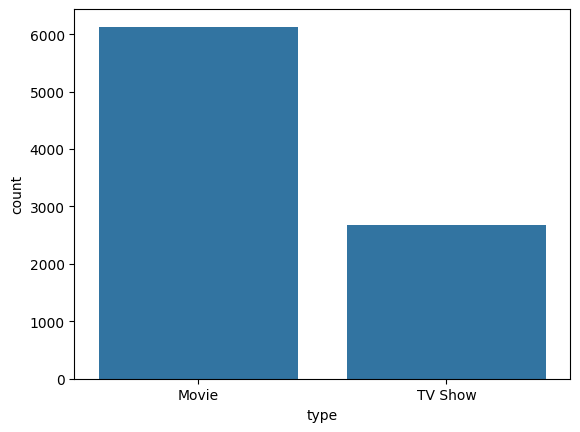

In [ ]:
#Visualization
# finding out the number of movies and Tv shows
sns.countplot(x="type", data=df)

<Axes: xlabel='rating', ylabel='count'>

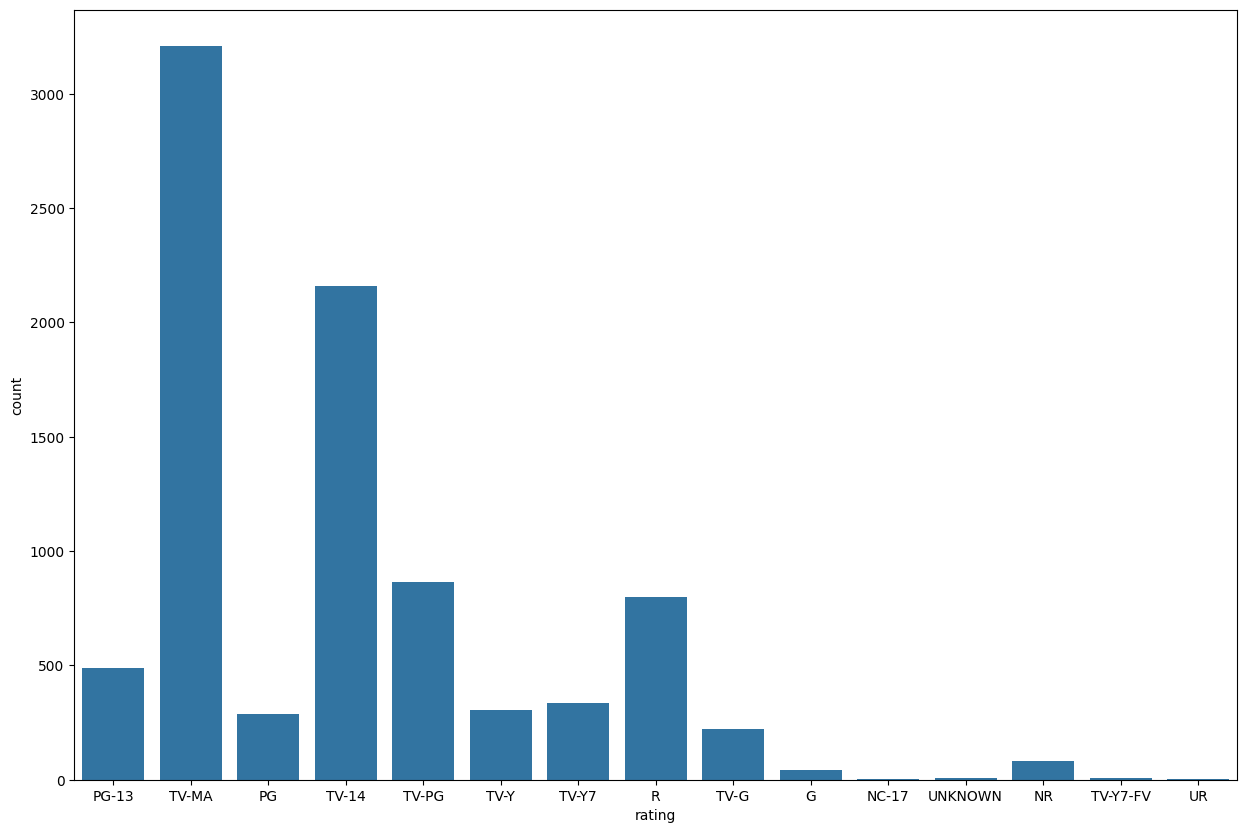

In [ ]:
# checking the distributions of the rating feature
plt.figure(figsize=(15,10))
sns.countplot(x="rating", data=df)

<Axes: xlabel='rating', ylabel='count'>

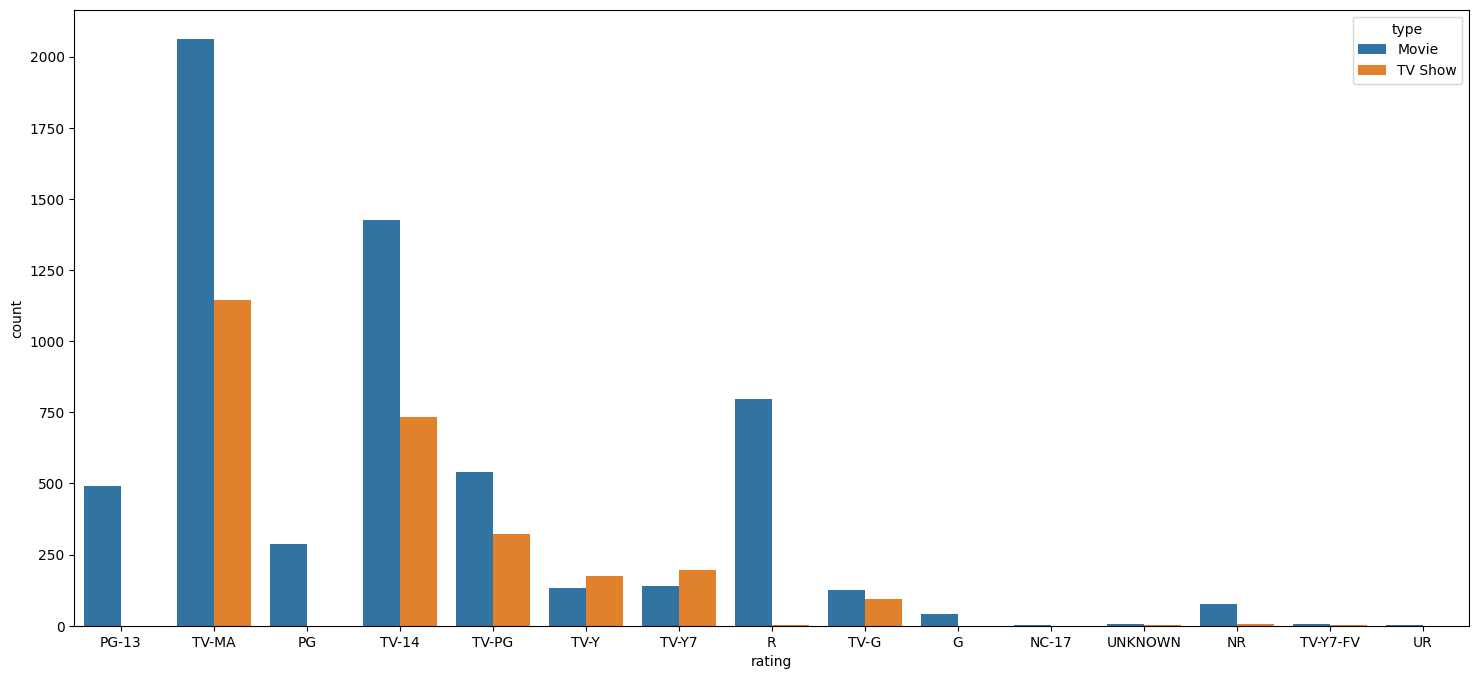

In [ ]:
# comparing the distributions of rating in terms of movie and tv shows
plt.figure(figsize=(18,8))
sns.countplot(x="rating", hue = "type", data=df)

<Axes: xlabel='release_year', ylabel='count'>

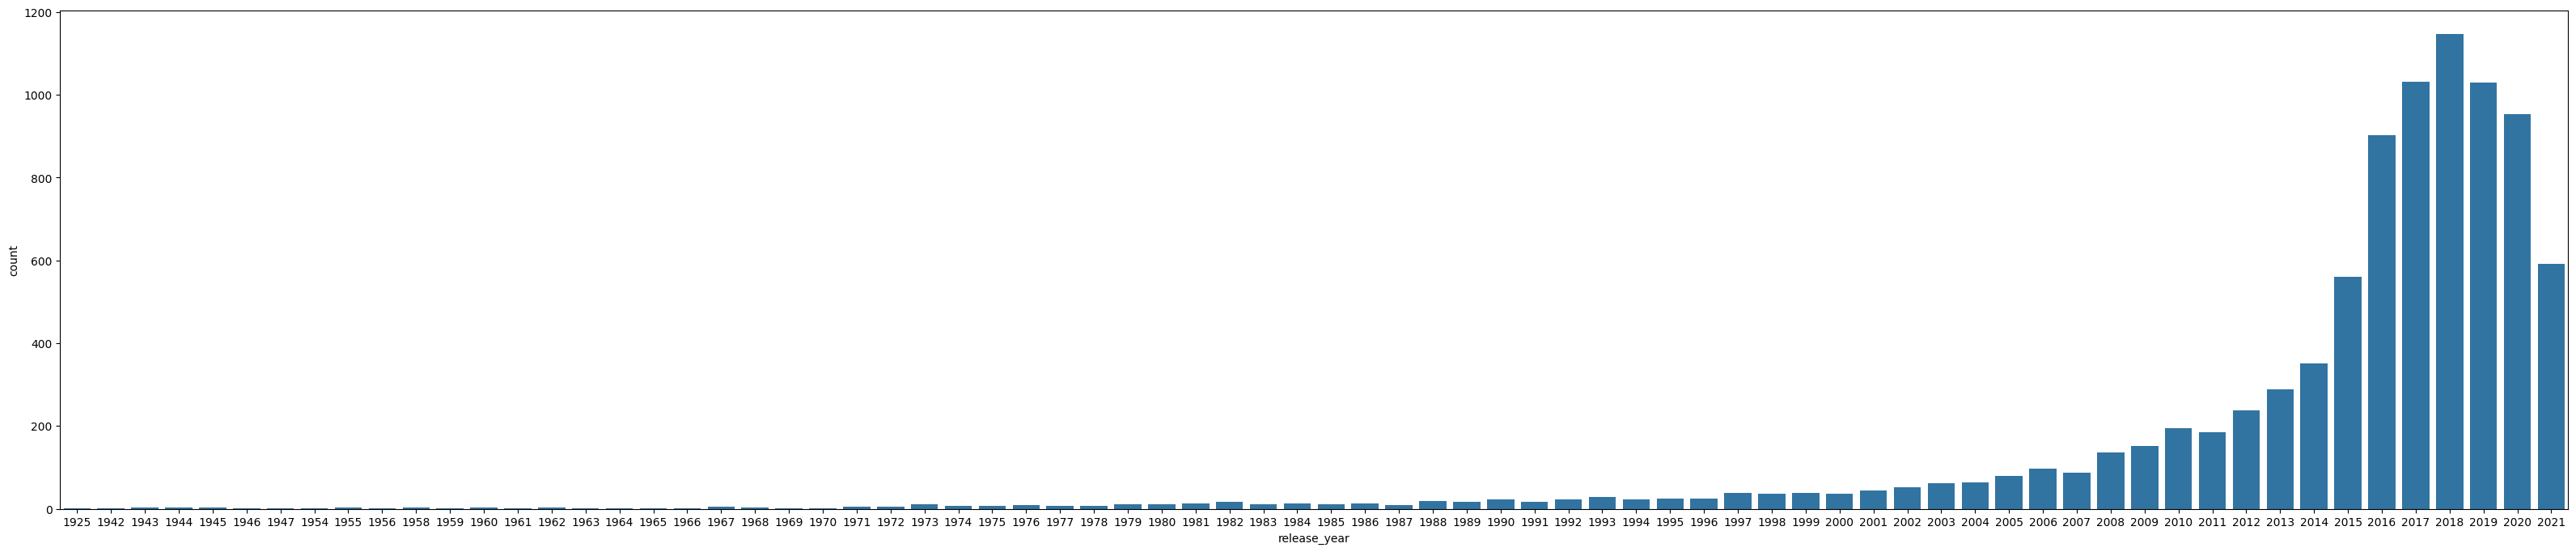

In [ ]:
# checking for the counts of movies and tv shows in each release year
plt.figure(figsize=(40,8))
sns.countplot(x="release_year", data=df)

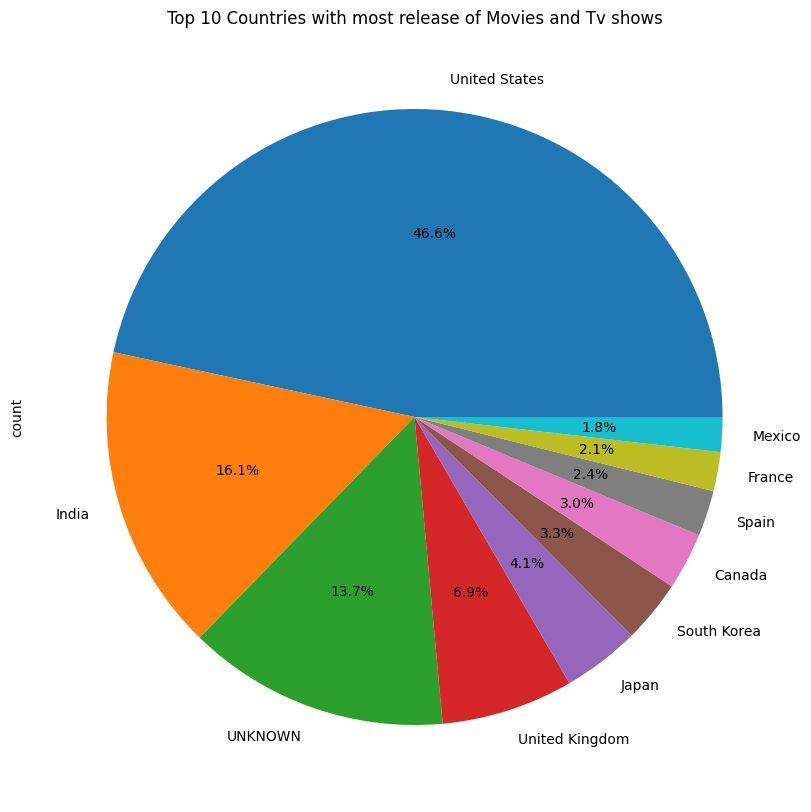

In [ ]:
# top 10 countries with most release of movies and tv shows
df["country"].value_counts()[:10].plot.pie(autopct="%1.1f%%", figsize=(10,10))
plt.title("Top 10 Countries with most release of Movies and Tv shows")
plt.show()

Text(0.5, 1.0, 'Top 10 Genres of Movies')

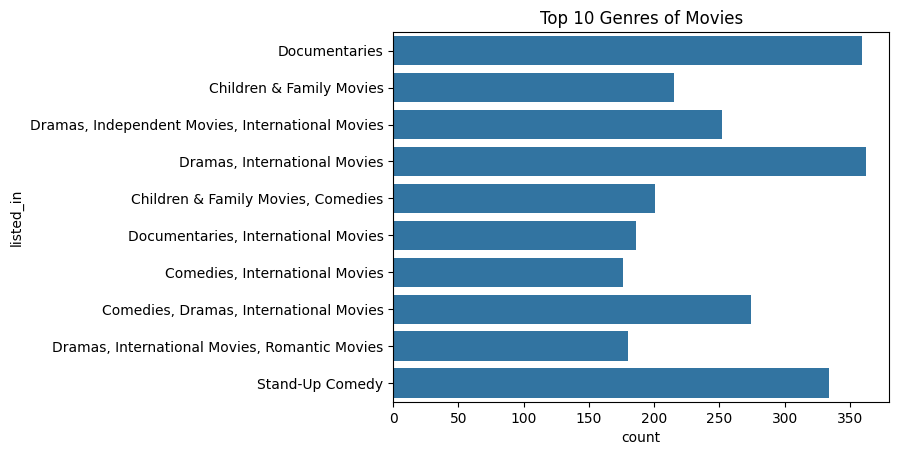

In [ ]:
# selecting top 10 frequenct genres of movies
df_movies = df[df["type"] == "Movie"]
df_top_10 = df_movies[df_movies["listed_in"].isin(df_movies["listed_in"].value_counts()[:10].index.to_list()) == True]

# plotting the frequency distribution of the genres of the Movies
#plt.figure(figsize=(35,10))
sns.countplot(y="listed_in", data= df_top_10)
plt.title("Top 10 Genres of Movies")

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

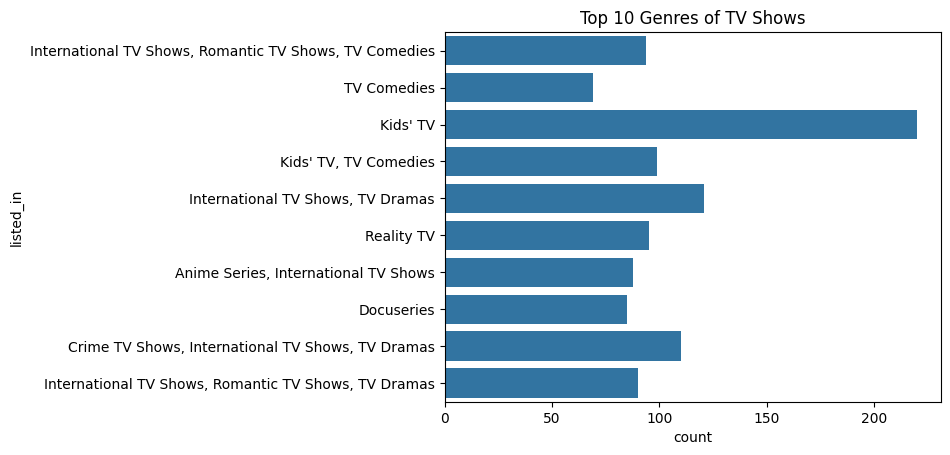

In [ ]:
# selecting top 10 frequenct genres of tv shows
df_tv = df[df["type"] == "TV Show"]
top_10 = df_tv[df_tv["listed_in"].isin(df_tv["listed_in"].value_counts()[:10].index.to_list()) == True]

# plotting the frequency distribution of the genres of the tv shows
#plt.figure(figsize=(35,10))
sns.countplot(y="listed_in", data= top_10)
plt.title("Top 10 Genres of TV Shows")

# **Project 2: Image Processing**


*Useful intro about [OpenCV](https://opencv.org/)*

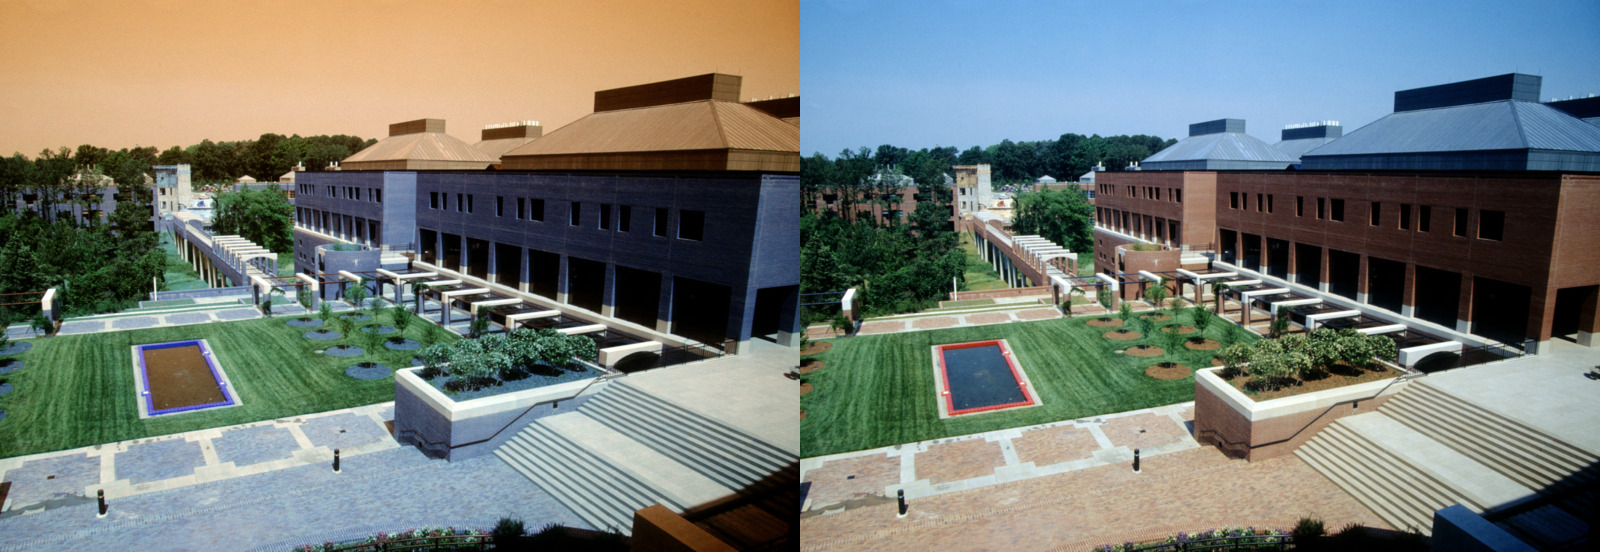

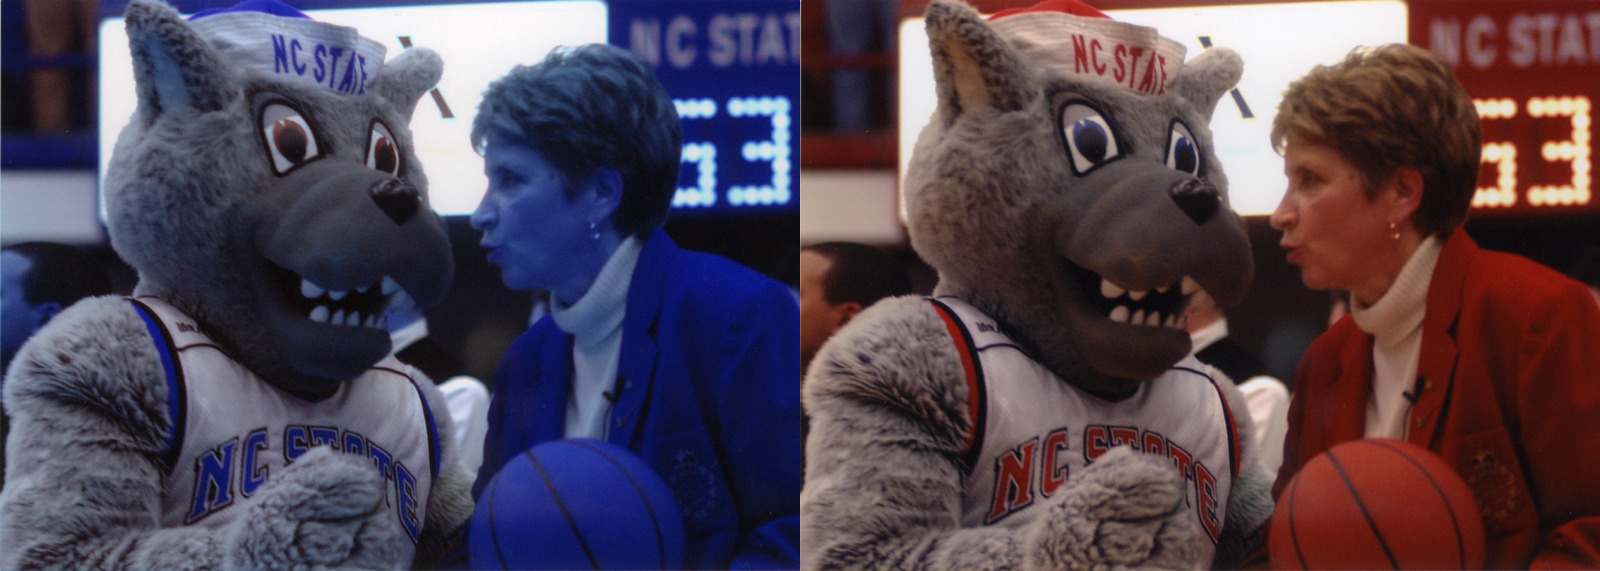



Error loading image from https://placekitten.com/800/571: HTTP Error 521: 


In [ ]:
#Load the library
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

#Read image

# Create a list to store the urls of the images
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
       "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
      "https://placekitten.com/800/571"]
# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  try: # this is a try-except block to handle potential errors
    image = io.imread(url)
    image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    final_frame = cv.hconcat((image, image_2))
    cv2_imshow(final_frame)
    print('\n')
  except Exception as e: # this section handles the exception and prints the error message
    print(f"Error loading image from {url}: {e}")

In [ ]:
# Check the image matrix data type (could know the bit depth of the image)
print(image.dtype)
# Check the height of image
print(image.shape[0])
# Check the width of image
print(image.shape[1])
# Check the number of channels of the image
print(image.shape[2])

uint8
571
800
3


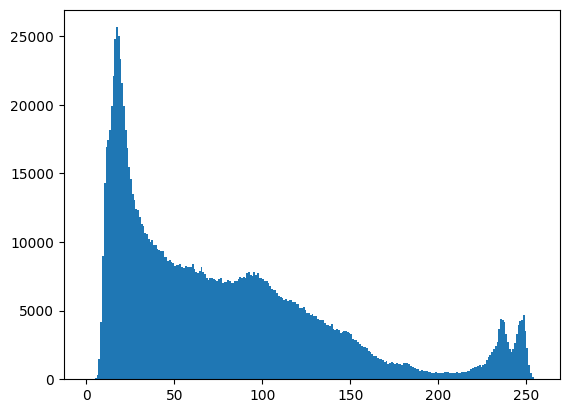

In [ ]:
#Generate Histogram of color image and grayscale image
plt.hist(image.ravel(),bins = 256, range = [0,256])
plt.show()

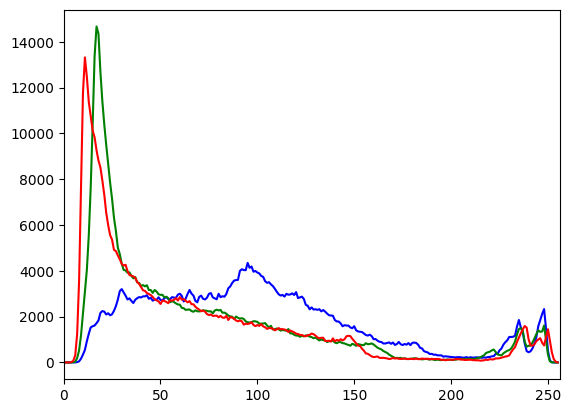

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

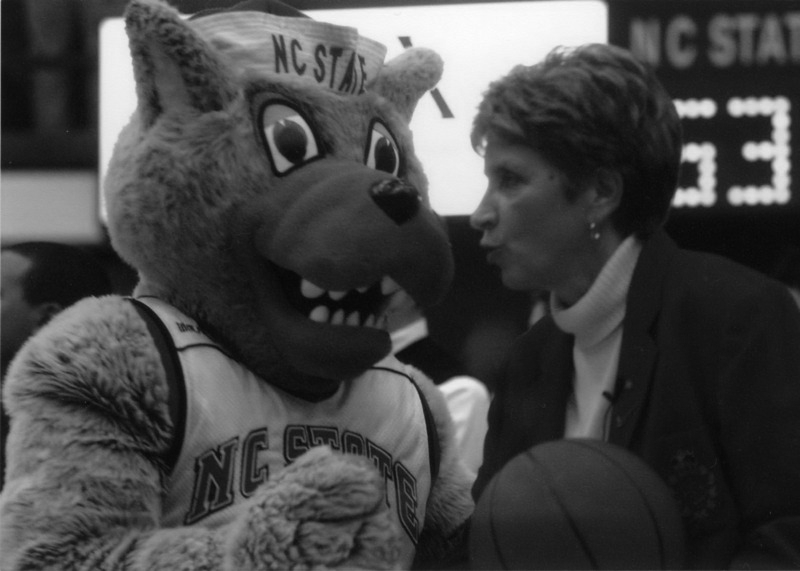

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

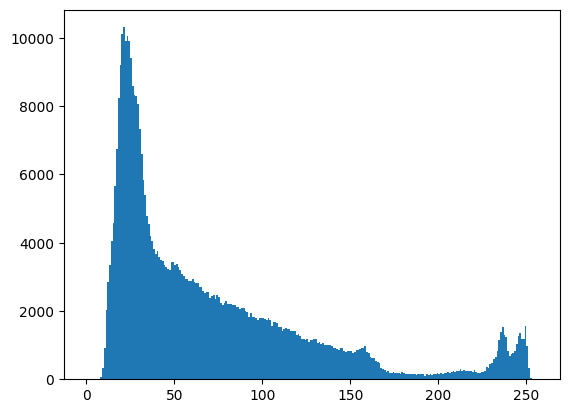

In [ ]:
# Plot the histogram of the gray image. We could observe that the frequency of
# the image hist has decreased ~ 1/3 of the histogram of color image
plt.hist(gray_image.ravel(),bins = 256, range = [0, 256])
plt.show()

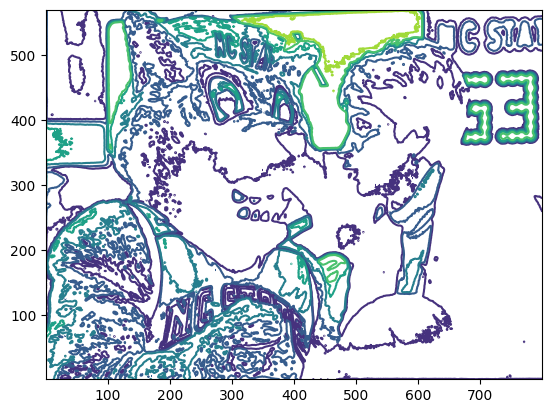

In [ ]:
#Find image contour of the grayscale image
plt.contour(gray_image, origin = "image")

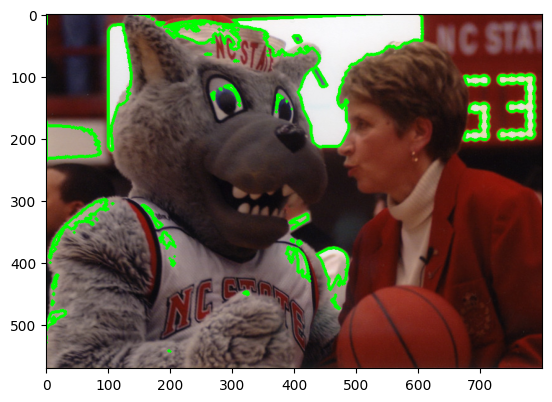

In [ ]:
# Set threshold for the countour detection
ret, thresh = cv.threshold(gray_image,150,255,0)
# Only unpack two values from the findContours function: contours and hierarchy.
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(image, contours, -1, (0, 255, 0), 3)
plt.imshow(image)

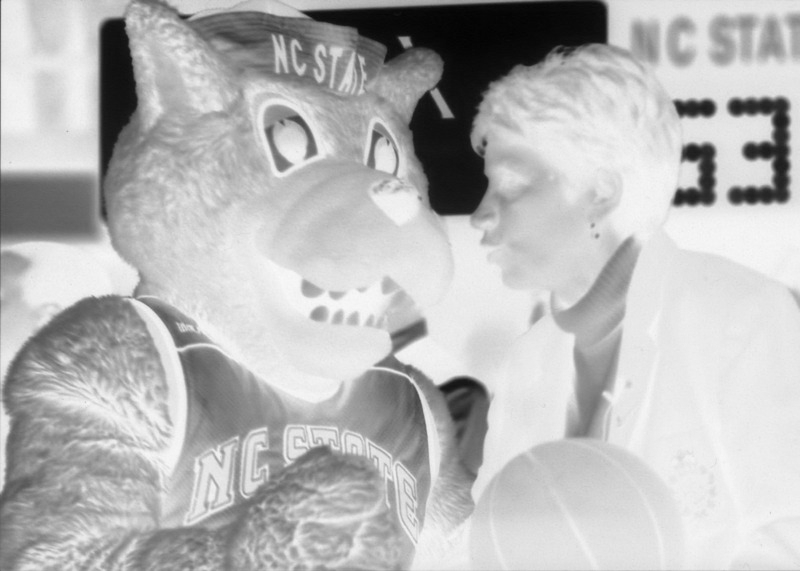

In [ ]:
#Grayscale Transform and Histogram Equalization
# This is an inverse operation of the grayscale image, you could see that the
# bright pixels become dark, and the dark pixels become bright
im2 = 255 - gray_image
cv2_imshow(im2)

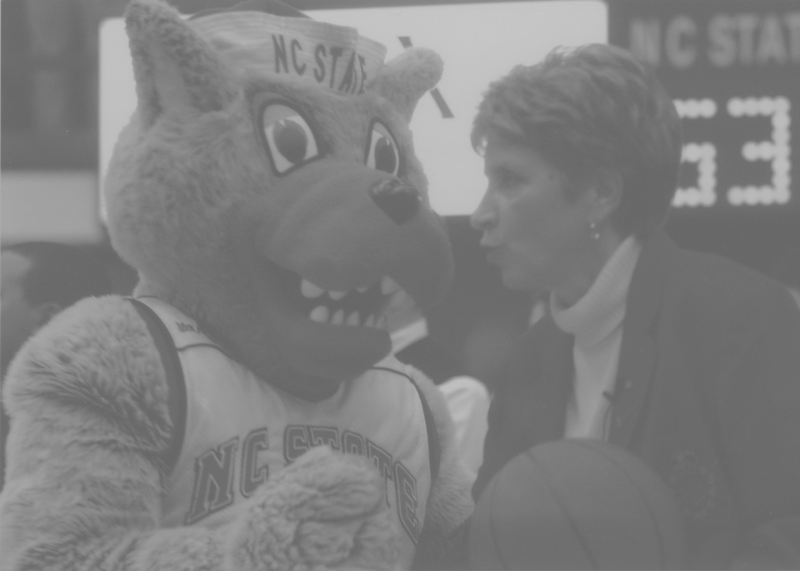

In [ ]:
# Another transform of the image, after adding a constant,
# all the pixels become brighter and a hazing-like effect of the image is generated
im3 = (100.0/255)*gray_image + 100
cv2_imshow(im3)

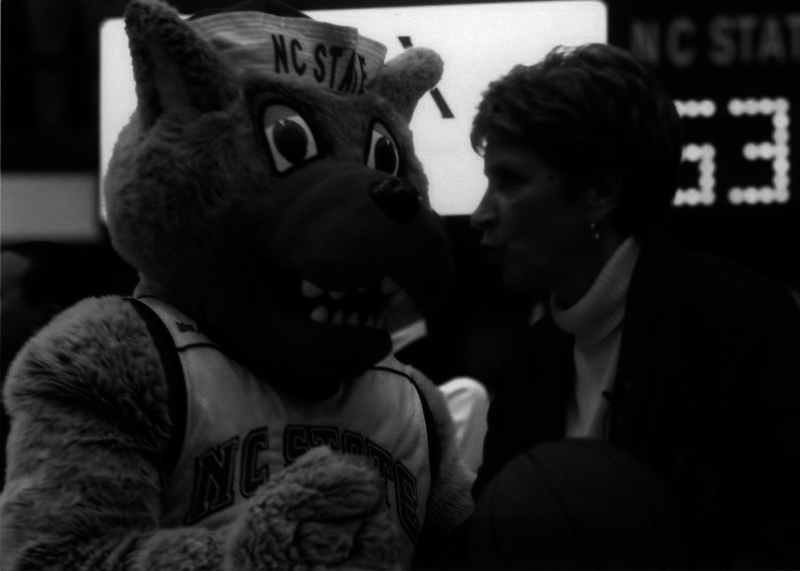

In [ ]:
# The lightness level of the gray_image decreases after this step
im4 = 255.0*(gray_image/255.0)**2
cv2_imshow(im4)

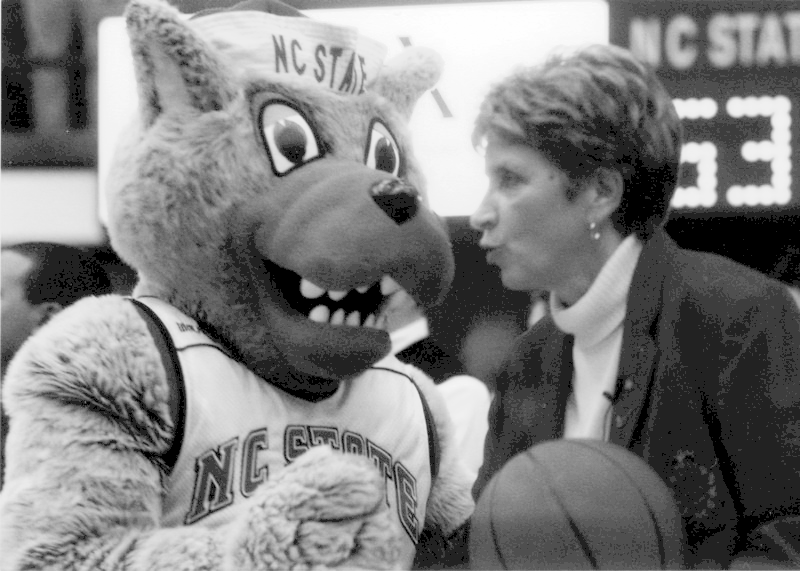

In [ ]:
#Histogram Equalization
#This section demonstrates histogram equalization on a dark image.
#This transform flattens the gray-level histogram so that all intensities are as
#equally common as possible. The transform function is a cumulative distribution function (cdf)
#of the pixel values in the image (normalized to map the range of pixel values to the desired range). This example uses image 4 (im4).

# function of histogram equalization
def histeq(im, nbr_bins = 256):
  """ Histogram equalization of a grayscale image.  """
  # get the image histogram
  imhist, bins = np.histogram(im.flatten(), nbr_bins, [0, 256])
  cdf = imhist.cumsum() # cumulative distribution function
  cdf = imhist.max()*cdf/cdf.max()  #normalize
  cdf_mask = np.ma.masked_equal(cdf, 0)
  cdf_mask = (cdf_mask - cdf_mask.min())*255/(cdf_mask.max()-cdf_mask.min())
  cdf = np.ma.filled(cdf_mask,0).astype('uint8')
  return cdf[im.astype('uint8')]

# apply the function on your dark image to increase the contrast
# we could observe that the contrast of the black background has increased
im5 = histeq(im4)
cv2_imshow(im5)

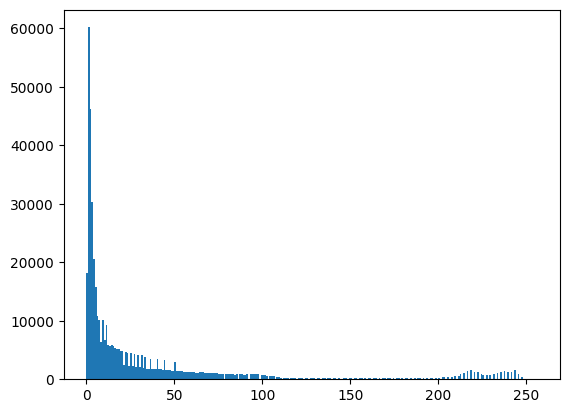

In [ ]:
# Extra: try to visualize the histogram of the image after histogram equalization
# Before histogram equalization
plt.hist(im4.ravel(),bins = 256, range = [0, 256])
plt.show()

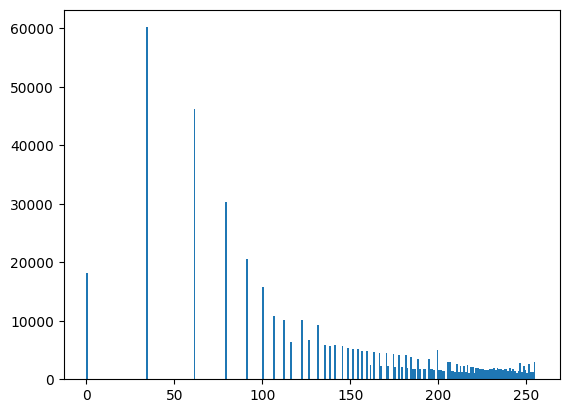

In [ ]:
# After histogram equalization
plt.hist(im5.ravel(),bins = 256, range = [0, 256])
plt.show()

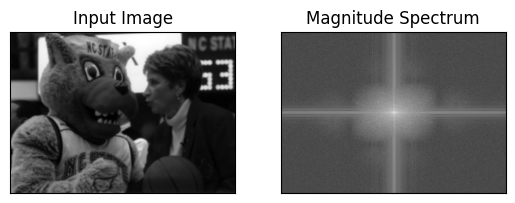

In [ ]:
# Fourier Transform of Gray Images
#A fourier transform is used to find the frequency domian of an image.
#You can consider an image as a signal which is sampled in two directions.
# So taking a fourier transform in both X and Y directions gives you the frequency representation of image.
#For the sinusoidal signal, if the amplitude varies so fast in short time, you can say it is a high frequency signal. If it varies slowly,
#it is a low frequency signal. Edges and noises are high frequency contents in an image because they change drastically in images.

# Blur the grayscale image by a Guassian filter with kernel size of 10
imBlur = cv.blur(gray_image,(5,5))
# Transform the image to frequency domain
f = np.fft.fft2(imBlur)
# Bring the zero-frequency component to the center
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

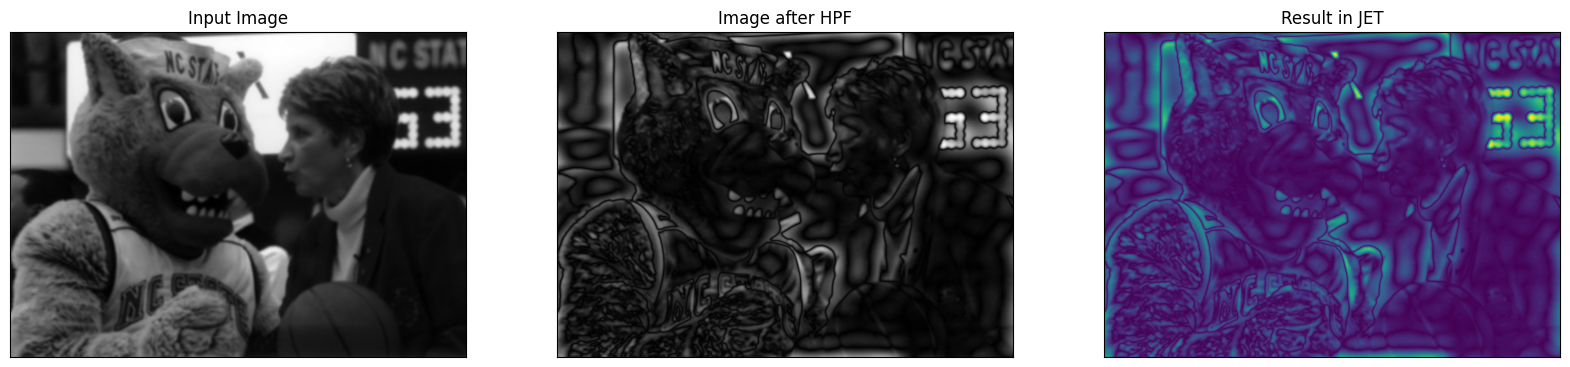

In [ ]:
#Finding Edges by Highpass Filtering
rows, cols = imBlur.shape
crow,ccol = round(rows/2) , round(cols/2)
# remove low frequencies with a rectangle size of 10
fshift[crow-10:crow+10, ccol-10:ccol+10] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=([20, 20]))
plt.subplot(131),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])
plt.show()

# Project 3:Car Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [ ]:
df = pd.read_csv("data.csv")
# To display the top 5 rows
df.head(5)

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [ ]:
df.tail(5)                        # To display the botton 5 rows

Make   Model  Year                Engine Fuel Type  Engine HP  \
11909    Acura     ZDX  2012     premium unleaded (required)      300.0   
11910    Acura     ZDX  2012     premium unleaded (required)      300.0   
11911    Acura     ZDX  2012     premium unleaded (required)      300.0   
11912    Acura     ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln  Zephyr  2006                regular unleaded      221.0   

       Engine Cylinders Transmission Type      Driven_Wheels  Number of Doors  \
11909               6.0         AUTOMATIC    all wheel drive              4.0   
11910               6.0         AUTOMATIC    all wheel drive              4.0   
11911               6.0         AUTOMATIC    all wheel drive              4.0   
11912               6.0         AUTOMATIC    all wheel drive              4.0   
11913               6.0         AUTOMATIC  front wheel drive              4.0   

                  Market Category Vehicle Size  Vehicle Style  highway MPG  \
11909  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11910  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11911  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11912  Crossover,Hatchback,Luxury      Midsize  4dr Hatchback           23   
11913                      Luxury      Midsize          Sedan           26   

       city mpg  Popularity   MSRP  
11909        16         204  46120  
11910        16         204  56670  
11911        16         204  50620  
11912        16         204  50920  
11913        17          61  28995

In [ ]:
#checking the type of data
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [ ]:
#droping irrelevant columns
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500

In [ ]:
#Renaming columns
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500

In [ ]:
#droping duplicate columns
df.shape

(11914, 10)

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (989, 10)


In [ ]:
df.count()      # Used to count the number of rows

Make            11914
Model           11914
Year            11914
HP              11845
Cylinders       11884
Transmission    11914
Drive Mode      11914
MPG-H           11914
MPG-C           11914
Price           11914
dtype: int64

In [ ]:
df = df.drop_duplicates()
df.head(5)

Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500

In [ ]:
#drop Null values
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP              69
Cylinders       30
Transmission     0
Drive Mode       0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


In [ ]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make            10827
Model           10827
Year            10827
HP              10827
Cylinders       10827
Transmission    10827
Drive Mode      10827
MPG-H           10827
MPG-C           10827
Price           10827
dtype: int64

In [ ]:
print(df.isnull().sum())   # After dropping the values

Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


<Axes: xlabel='Price'>

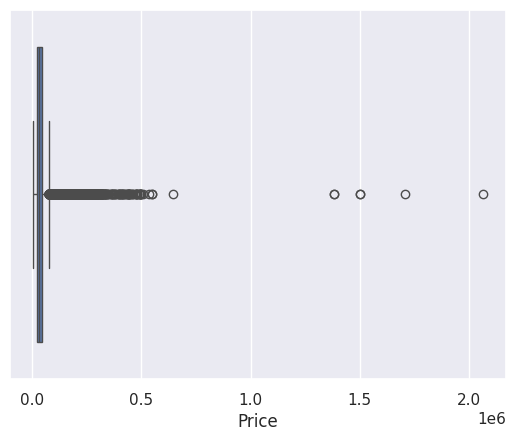

In [ ]:
#Deleting Outliers
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

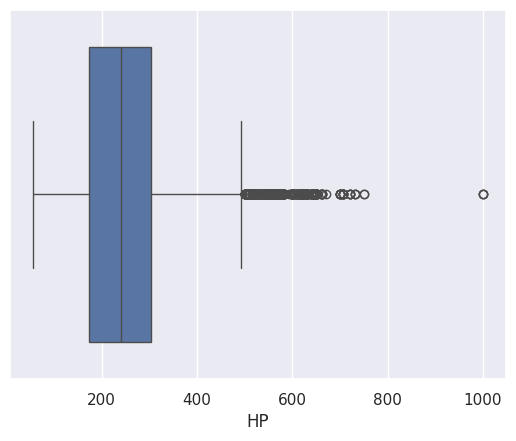

In [ ]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

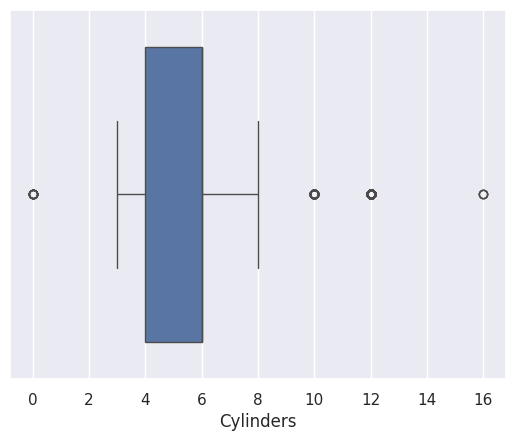

In [ ]:
sns.boxplot(x=df['Cylinders'])

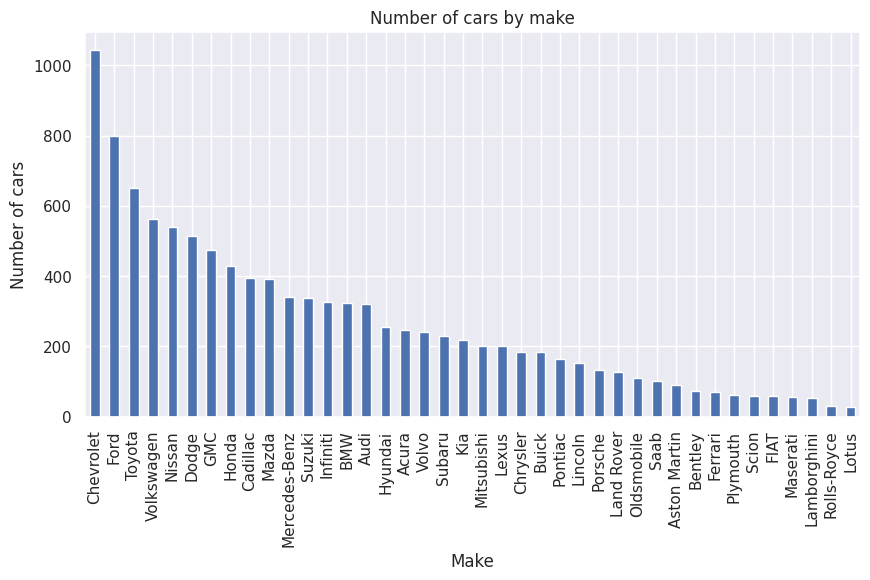

In [ ]:
#Plot different features against one another (scatter), against frequency (histogram)
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

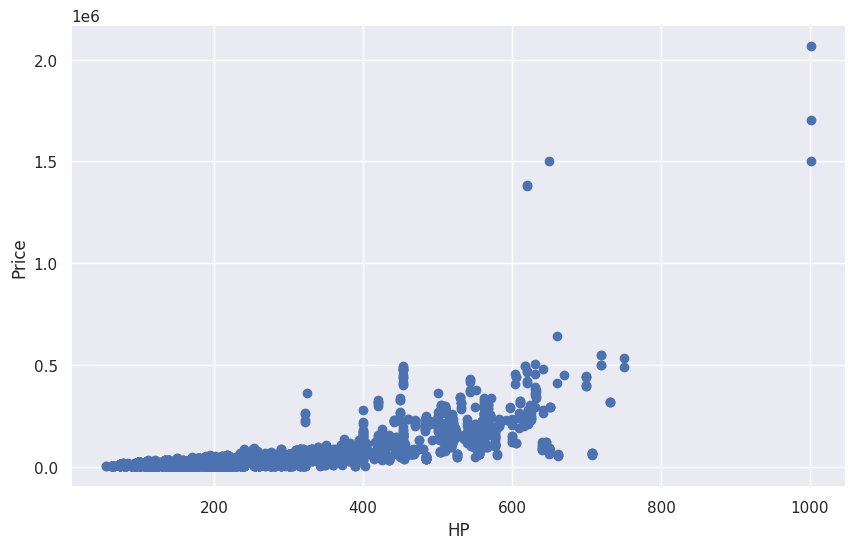

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

# **Class Activity**

**Recommendation System: Amazon Products**


Online E-commerce websites like Amazon and Flipkart use various recommendation models to provide personalized suggestions to users. Amazon employs item-to-item collaborative filtering, which can handle massive datasets and deliver high-quality recommendations in real time. This method matches each user's purchased and rated items to similar items, then combines those into a recommendation list tailored for the user. In this project, we aim to build a recommendation model for Amazon's electronics products. The dataset used in this project is sourced from the Amazon Reviews data repository, specifically the Electronics dataset.

In [ ]:
#import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv("/content/ratings_Electronics (1).csv",
                             names=['UserId', 'ProductId','Score','Time'])

# **Question 1**


We are looking to get some overview about the data. Some information, such as index range, number of the features(column), type of the each column, memory usage, non-null values, and etc.

Write a python code to get this information and display the first few rows.

# **Question 2**



Do we have any missing values or any duplicate values? if we have can you drop it from the data? and display the first few rows?

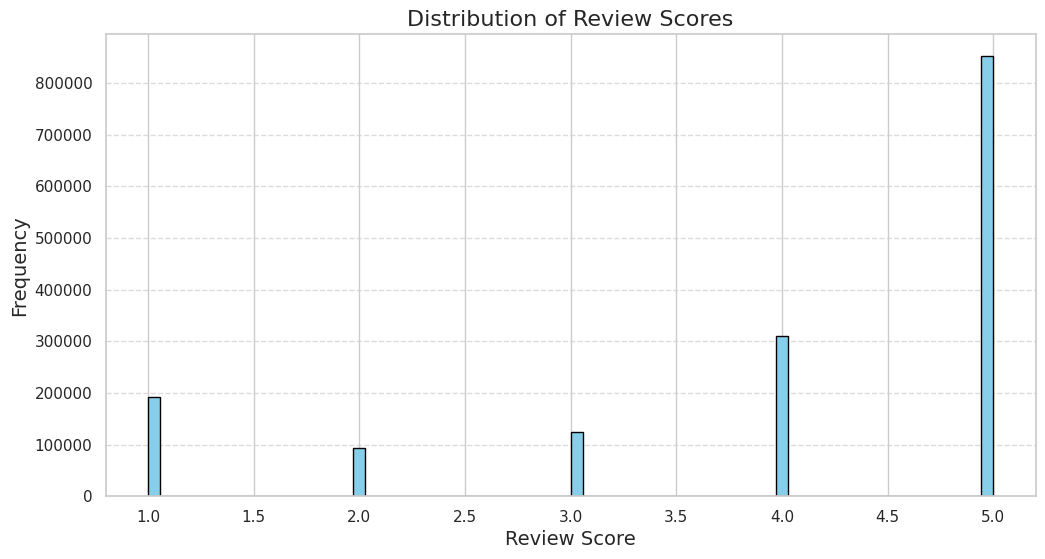

In [ ]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Refined Histogram for Score Distribution
plt.figure(figsize=(12, 6))
plt.hist(data['Score'], bins=70, color='skyblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Review Scores', fontsize=16)
plt.xlabel('Review Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# **Question 3**



Can you analyze the above figure? what can you understand from the figure?

UserId
A5JLAU2ARJ0BO     435
A231WM2Z2JL0U3    249
A6FIAB28IS79      212
A25HBO5V8S8SEA    164
AKT8TGIT6VVZ5     151
A3OXHLG6DIBRW8    145
AT6CZDCP4TRGA     135
A680RUE1FDO8B     133
A203OCQQ12MAVT    131
A11D1KHM7DVOQK    112
Name: count, dtype: int64


<ipython-input-92-6d9f383792f0>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




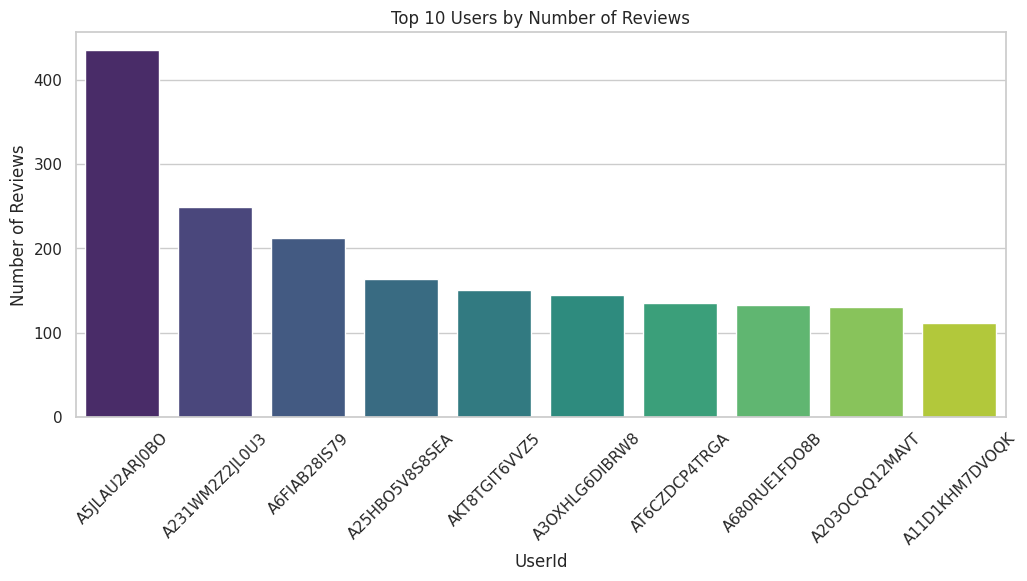

ProductId
B0002L5R78    9487
B000LRMS66    8715
B0001FTVEK    5345
B000I68BD4    4903
B000S5Q9CA    4690
B000VX6XL6    4315
B000BQ7GW8    4275
B000QUUFRW    4037
B00007E7JU    3523
B000JMJWV2    3446
Name: count, dtype: int64


<ipython-input-92-6d9f383792f0>:20: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




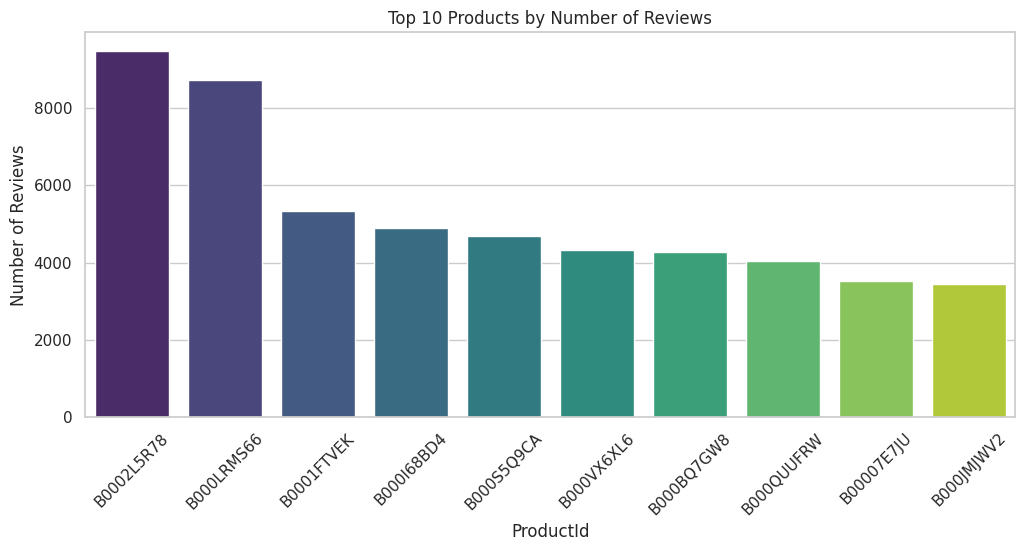

In [ ]:
#Top 10 users with the most reviews
top_users = data['UserId'].value_counts().head(10)
print(top_users)

# Visualizing Top 10 users
plt.figure(figsize=(12, 5))
sns.barplot(x=top_users.index, y=top_users.values, palette='viridis')
plt.title('Top 10 Users by Number of Reviews')
plt.xlabel('UserId')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# Top 10 products with the most reviews
top_products = data['ProductId'].value_counts().head(10)
print(top_products)

# Visualizing Top 10 products
plt.figure(figsize=(12, 5))
sns.barplot(x=top_products.index, y=top_products.values, palette='viridis')
plt.title('Top 10 Products by Number of Reviews')
plt.xlabel('ProductId')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

# **Question 4**

What can you learn from the below figure? How the time impact the number of the reviews based on the figure?

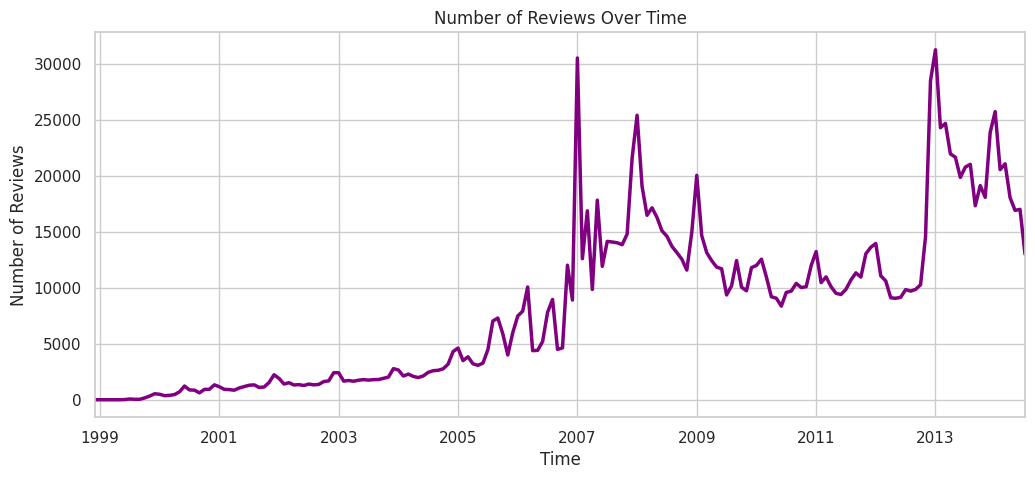

In [ ]:
# Convert the Unix timestamp to a datetime object
data['Time'] = pd.to_datetime(data['Time'], unit='s')

# Number of reviews over time
plt.figure(figsize=(12, 5))
data.groupby(data['Time'].dt.to_period('M')).size().plot(kind='line', linewidth=2.5, color='purple')
plt.title('Number of Reviews Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.show()

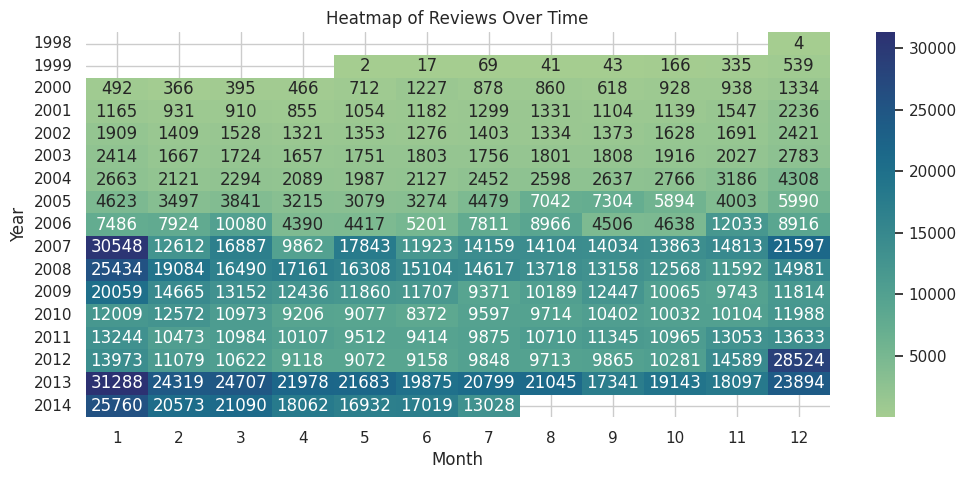

In [ ]:
# Extract year and month from the Time column
data['Year'] = data['Time'].dt.year
data['Month'] = data['Time'].dt.month

# Pivot table to create a heatmap
heatmap_data = data.pivot_table(index='Year', columns='Month', values='Score', aggfunc='count')

plt.figure(figsize=(12, 5))
sns.heatmap(heatmap_data, cmap='crest', annot=True, fmt='g')
plt.title('Heatmap of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

# **Question 5**




Heatmaps are graphical representations of data where individual values are represented by colors. They are commonly used to visualize the intensity of values in a matrix-like dataset, making it easier to identify patterns, correlations, and trends.

Key points about heatmaps:



1.   **Colors represent values:** The color gradient, typically ranging from cool colors (low values) to warm colors (high values), indicates the magnitude of the data points.


2. **Axes represent categories:** The rows and columns often correspond to different categories or variables, allowing easy comparison.

3. **Correlation heatmaps:** In data analysis, heatmaps are commonly used to visualize correlation matrices, showing the strength of relationships between variables.

4. **Pattern recognition:** Heatmaps are useful for spotting clusters, outliers, or significant areas within the dataset at a glance.


They are widely used in various fields, such as finance, bioinformatics, and machine learning, to interpret complex datasets visually.


What do you learn from the above heatmap about the used data?
